In [1]:
import h5py


In [2]:
def list_paths(h5_path):
    with h5py.File(h5_path, 'r') as f:
        audio_paths = f['audio']  # typically stores path strings
        for i, item in enumerate(audio_paths):
            print(f"[{i}] {item.decode()}")

# Example usage
list_paths("/scratch/yc01847/FAIR-Play/splits/split1/test.h5")

[0] /scratch/yc01847/FAIR-Play/binaural_audios/000794.wav
[1] /scratch/yc01847/FAIR-Play/binaural_audios/001158.wav
[2] /scratch/yc01847/FAIR-Play/binaural_audios/001353.wav
[3] /scratch/yc01847/FAIR-Play/binaural_audios/001401.wav
[4] /scratch/yc01847/FAIR-Play/binaural_audios/001495.wav
[5] /scratch/yc01847/FAIR-Play/binaural_audios/000980.wav
[6] /scratch/yc01847/FAIR-Play/binaural_audios/001204.wav
[7] /scratch/yc01847/FAIR-Play/binaural_audios/000226.wav
[8] /scratch/yc01847/FAIR-Play/binaural_audios/000768.wav
[9] /scratch/yc01847/FAIR-Play/binaural_audios/001617.wav
[10] /scratch/yc01847/FAIR-Play/binaural_audios/001372.wav
[11] /scratch/yc01847/FAIR-Play/binaural_audios/001620.wav
[12] /scratch/yc01847/FAIR-Play/binaural_audios/001086.wav
[13] /scratch/yc01847/FAIR-Play/binaural_audios/000064.wav
[14] /scratch/yc01847/FAIR-Play/binaural_audios/001595.wav
[15] /scratch/yc01847/FAIR-Play/binaural_audios/001063.wav
[16] /scratch/yc01847/FAIR-Play/binaural_audios/000438.wav
[17] /s

In [3]:
list_paths("/scratch/yc01847/FAIR-Play/splits/split1/train.h5")

[0] /scratch/yc01847/FAIR-Play/binaural_audios/001257.wav
[1] /scratch/yc01847/FAIR-Play/binaural_audios/000649.wav
[2] /scratch/yc01847/FAIR-Play/binaural_audios/001397.wav
[3] /scratch/yc01847/FAIR-Play/binaural_audios/000143.wav
[4] /scratch/yc01847/FAIR-Play/binaural_audios/000234.wav
[5] /scratch/yc01847/FAIR-Play/binaural_audios/001471.wav
[6] /scratch/yc01847/FAIR-Play/binaural_audios/001817.wav
[7] /scratch/yc01847/FAIR-Play/binaural_audios/000163.wav
[8] /scratch/yc01847/FAIR-Play/binaural_audios/001752.wav
[9] /scratch/yc01847/FAIR-Play/binaural_audios/000452.wav
[10] /scratch/yc01847/FAIR-Play/binaural_audios/000616.wav
[11] /scratch/yc01847/FAIR-Play/binaural_audios/001756.wav
[12] /scratch/yc01847/FAIR-Play/binaural_audios/000833.wav
[13] /scratch/yc01847/FAIR-Play/binaural_audios/000102.wav
[14] /scratch/yc01847/FAIR-Play/binaural_audios/001115.wav
[15] /scratch/yc01847/FAIR-Play/binaural_audios/000440.wav
[16] /scratch/yc01847/FAIR-Play/binaural_audios/000191.wav
[17] /s

In [4]:
h5_path = '/scratch/yc01847/FAIR-Play/splits/split1/train.h5'
with h5py.File(h5_path, 'r') as h5f:
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"📄 Dataset: {name}, shape: {obj.shape}, dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"📁 Group: {name}")

    h5f.visititems(print_structure)

📄 Dataset: audio, shape: (1497,), dtype: |S71


In [ ]:
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

text = clip.tokenize(["a dog is barking on the left"]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text)  # (1, 512)

In [6]:
from transformers import CLIPTokenizer, CLIPModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

text_input = tokenizer(["a dog is barking on the left"], return_tensors="pt").to(device)
with torch.no_grad():
    text_features = model.get_text_features(**text_input)  # (1, 512)

In [8]:
print(text_features)  

tensor([[ 3.5805e-01,  9.5763e-02, -2.4841e-01, -6.1176e-02,  2.1613e-01,
          7.1460e-02,  1.6441e-01, -1.3216e+00, -1.9463e-01,  4.5173e-01,
         -1.4233e-01,  3.2713e-02, -8.5638e-02, -4.6402e-02,  2.3187e-01,
          2.0449e-01, -5.0445e-02, -3.0400e-01, -1.3075e-01,  2.7104e-01,
          1.1196e-01,  2.3496e-02,  7.7106e-02,  6.4169e-02,  1.1074e-01,
          3.4149e-02,  1.1896e-01,  1.2631e-01,  7.9159e-02,  2.9529e-02,
          3.2396e-01, -4.2884e-02, -7.6970e-03, -9.8094e-02, -8.6538e-02,
          4.2482e-02,  1.7770e-01,  6.4737e-02,  1.7211e-01,  1.4717e-01,
         -2.2167e-01, -9.6239e-02,  1.9236e-01, -7.0044e-02, -3.7036e-02,
          4.1538e-01, -1.6278e-02, -3.4015e-02, -1.4758e-01, -1.1248e-01,
         -5.6893e-02, -1.5121e-01,  2.9771e-01,  1.0397e-02, -3.6073e-02,
          6.3569e-02,  1.7309e-01, -1.4109e-01, -3.9600e-02, -2.6108e-01,
          1.9490e-01,  5.4351e-02, -9.1399e-02,  2.9173e-01,  1.2216e-03,
         -1.8059e-01, -1.5516e-01, -2.

Cosine similarity: 0.8934


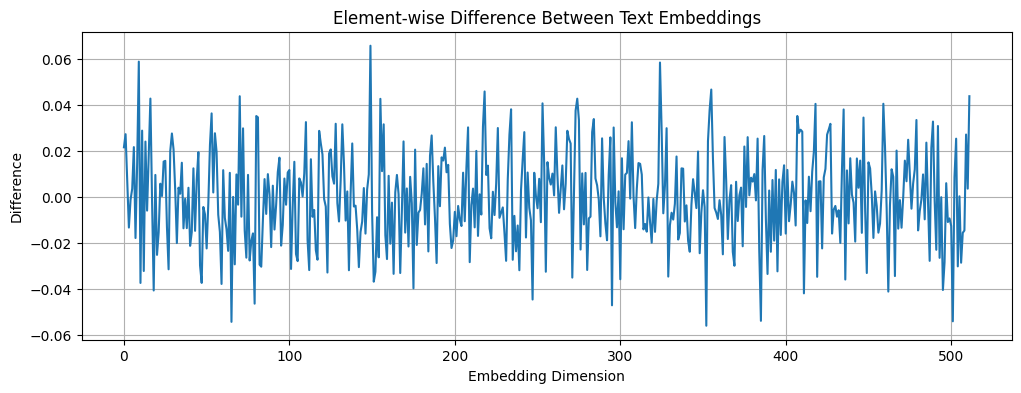

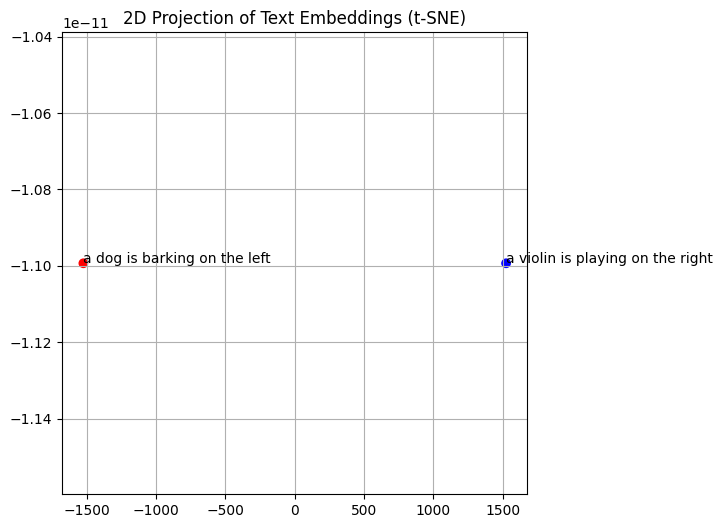

In [12]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

# Two prompts
prompts = ["a dog is barking on the left", "a violin is playing on the right"]

# Tokenize and encode
inputs = tokenizer(prompts, return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    features = model.get_text_features(**inputs)  # (2, 512)
    features = features / features.norm(dim=-1, keepdim=True)  # normalize

# Cosine similarity
cos_sim = torch.nn.functional.cosine_similarity(features[0], features[1], dim=0).item()
print(f"Cosine similarity: {cos_sim:.4f}")

# Raw difference
diff = (features[0] - features[1]).cpu().numpy()

# Visualize difference vector
plt.figure(figsize=(12, 4))
plt.plot(diff)
plt.title("Element-wise Difference Between Text Embeddings")
plt.xlabel("Embedding Dimension")
plt.ylabel("Difference")
plt.grid(True)
plt.show()

# Optional: project to 2D (t-SNE or PCA)
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
proj = tsne.fit_transform(features.cpu().numpy())

plt.figure(figsize=(6, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=['red', 'blue'])
for i, txt in enumerate(prompts):
    plt.annotate(txt, (proj[i, 0]+0.01, proj[i, 1]))
plt.title("2D Projection of Text Embeddings (t-SNE)")
plt.grid(True)
plt.show()

In [13]:
from transformers import ClapProcessor, ClapModel

model = ClapModel.from_pretrained("laion/clap-htsat-unfused")
processor = ClapProcessor.from_pretrained("laion/clap-htsat-unfused")
inputs = processor(text=["a dog is barking on the left"], return_tensors="pt")
text_embeds = model.get_text_features(**inputs)  # or get_text_embedding()

In [15]:
print(text_embeds.shape)

torch.Size([1, 512])
